In [38]:
# Necessary packages for visualisation

import os
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score

import numpy as np
from scipy.spatial.distance import mahalanobis

In [39]:
with open('similarity_in_distribution.pkl', 'rb') as f:
    in_dist_sim = pickle.load(f)

with open('similarity_out_of_distribution.pkl', 'rb') as f:
    out_dist_sim = pickle.load(f)

with open('test_pixel_accuracies_OOD.pkl', 'rb') as f:
    pixel_acc_OOD = pickle.load(f)

with open('test_pixel_accuracies_no_cl.pkl', 'rb') as f:
    pixel_acc_OOD_no_cl = pickle.load(f)

with open('test_pixel_accuracies_ID.pkl', 'rb') as f:
    pixel_acc_ID = pickle.load(f)

with open('test_pixel_accuracies_no_cl_trained.pkl', 'rb') as f:
    pixel_acc_OOD_no_cl_trained = pickle.load(f)

with open('test_pixel_accuracies_no_cl_trained2.pkl', 'rb') as f:
    pixel_acc_OOD_no_cl_trained2 = pickle.load(f)

training_embeddings0 = np.loadtxt('train_embeddings_tensor_0.txt', delimiter=' ')
training_embeddings1 = np.loadtxt('train_embeddings_tensor_1.txt', delimiter=' ')
training_embeddings2 = np.loadtxt('train_embeddings_tensor_2.txt', delimiter=' ')
training_embeddings3 = np.loadtxt('train_embeddings_tensor_3.txt', delimiter=' ')
training_embeddings4 = np.loadtxt('train_embeddings_tensor_4.txt', delimiter=' ')
training_embeddings5 = np.loadtxt('train_embeddings_tensor_5.txt', delimiter=' ')
training_embeddings6 = np.loadtxt('train_embeddings_tensor_6.txt', delimiter=' ')
training_embeddings7 = np.loadtxt('train_embeddings_tensor_7.txt', delimiter=' ')
training_embeddings8 = np.loadtxt('train_embeddings_tensor_8.txt', delimiter=' ')
training_embeddings9 = np.loadtxt('train_embeddings_tensor_9.txt', delimiter=' ')

In [40]:
test_query = np.load('test_query_OOD.npy', allow_pickle = True)

In [41]:
# Plotting aesthetics using seaborn 

import matplotlib.ticker as ticker
import seaborn as sns

sns.set(
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.despine(left=False, bottom=False, top = False, right = False)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

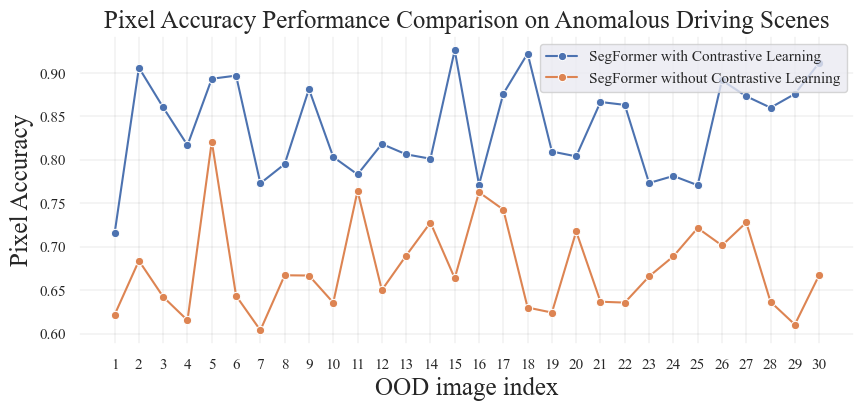

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.despine(left=False, bottom=False, top=False, right=False)
sns.set(font_scale=1.5, rc={"font.family": "serif", "font.serif": ["Times New Roman"]})
sns.set_context("notebook", rc={"font.size": 16, "axes.titlesize": 18, "axes.labelsize": 18})

images = list(range(1, 31))
plt.figure(figsize=(10, 4))

# Set plot background color
ax = plt.gca()
ax.set_facecolor('white')

# Plotting the pixel accuracy scores for both models
sns.lineplot(x=images, y=pixel_acc_OOD, label='SegFormer with Contrastive Learning', marker='o')
sns.lineplot(x=images, y=pixel_acc_OOD_no_cl, label='SegFormer without Contrastive Learning', marker='o')

# Adding labels and title
plt.xlabel('OOD image index')
plt.ylabel('Pixel Accuracy')
plt.title('Pixel Accuracy Performance Comparison on Anomalous Driving Scenes')
plt.xticks(images)  # Set x-axis ticks to be the image numbers

# Adding legend
plt.legend()

# Adding grid lines
ax.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.5)

# Save the plot
plt.savefig('with_without_contrastive.pdf', bbox_inches='tight')  
#plt.show()


In [46]:
print('The pixel accuracy of ID images is: {} \
      \nThe pixel accuracy of OOD images is: {}'\
      .format(np.mean(pixel_acc_ID), np.mean(pixel_acc_OOD)))

The pixel accuracy of ID images is: 0.8699165760465428       
The pixel accuracy of OOD images is: 0.8376479045568078


# Exploring the difference in the embeddings

In [6]:
in_dist_sim_means = [np.mean(array, axis=1) for array in in_dist_sim]
out_dist_sim_means = [np.mean(array, axis=1) for array in out_dist_sim]

In [7]:
training_embeddings = [training_embeddings0, training_embeddings1, training_embeddings2, training_embeddings3, training_embeddings4, \
                       training_embeddings5, training_embeddings6, training_embeddings7, training_embeddings8, training_embeddings9]

In [9]:
def cosine_scores():

    train_embs = np.array(training_embeddings[9][0:3]).flatten()
    cosine_scores_ood = []
    cosine_scores_id = []

    for i in range(30):
        cosine_scores_ood.append(np.dot(train_embs, np.array(test_query[i]).flatten())/(norm(train_embs)*norm(np.array(test_query[i]).flatten())))

        cosine_scores_id.append(np.dot(train_embs, np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten())\
                            /(norm(train_embs)*norm(np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten())))

    return cosine_scores_ood, cosine_scores_id

cos_scores = cosine_scores()

In [10]:
def euclidean_scores():

    train_embs = np.array(training_embeddings[9][0:3]).flatten()
    euclidean_scores_ood = []
    euclidean_scores_id = []

    for i in range(30):
        euclidean_scores_ood.append(np.linalg.norm(train_embs - np.array(test_query[i]).flatten()))
        euclidean_scores_id.append(np.linalg.norm(train_embs - np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten()))

    return euclidean_scores_ood, euclidean_scores_id

euclidean_scores = euclidean_scores()

In [31]:
def manhattan_scores():

    train_embs = np.array(training_embeddings[9][0:3]).flatten()
    manhattan_scores_ood = []
    manhattan_scores_id = []

    for i in range(30):
        manhattan_scores_ood.append(np.linalg.norm(train_embs - np.array(test_query[i]).flatten(), ord=1))

        id_embedding = np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten()
        manhattan_scores_id.append(np.linalg.norm(train_embs - id_embedding, ord=1))

    return manhattan_scores_ood, manhattan_scores_id

manhattan_scores = manhattan_scores()

In [32]:
import numpy as np

def minkowski_scores(power=2):

    train_embs = np.array(training_embeddings[9][0:3]).flatten()
    minkowski_scores_ood = []
    minkowski_scores_id = []

    for i in range(30):
        minkowski_scores_ood.append(np.linalg.norm(train_embs - np.array(test_query[i]).flatten(), ord=power))

        id_embedding = np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten()
        minkowski_scores_id.append(np.linalg.norm(train_embs - id_embedding, ord=power))

    return minkowski_scores_ood, minkowski_scores_id

minkowski_scores_euclidean = minkowski_scores(power=1)

In [33]:
def hamming_scores():

    train_embs = np.array(training_embeddings[9][0:3]).flatten()
    hamming_scores_ood = []
    hamming_scores_id = []

    # Convert embeddings to binary (you need to adjust this based on your data)
    train_embs_binary = (train_embs > 0.5).astype(int)

    for i in range(30):
        test_query_binary = (np.array(test_query[i]).flatten() > 0.5).astype(int)
        hamming_distance_ood = np.sum(train_embs_binary != test_query_binary)

        id_embedding_binary = (np.array(np.loadtxt('test_embeddings_ID/array_{}.txt'.format(i))).flatten() > 0.5).astype(int)
        hamming_distance_id = np.sum(train_embs_binary != id_embedding_binary)

        hamming_scores_ood.append(hamming_distance_ood)
        hamming_scores_id.append(hamming_distance_id)

    return hamming_scores_ood, hamming_scores_id

hamming_scores = hamming_scores()

In [34]:
def thresh_acc(ood_scores, id_scores, thresh, label):
    anomalous_out = [value for value in ood_scores if value > thresh]
    anomalous_in = [value for value in id_scores if value > thresh]

    labels = [0] * len(anomalous_out) + [1] * len(anomalous_in)
    scores = anomalous_out + anomalous_in

    auc = roc_auc_score(labels, scores)
    ap = average_precision_score(labels, scores)

    fpr, tpr, _ = roc_curve(labels, scores)
    idx = next(i for i, tpr_value in enumerate(tpr) if tpr_value >= 0.95)
    fpr95 = fpr[idx]

    # Set plot background color
    ax = plt.gca()
    ax.set_facecolor('white')

    sns.despine(left=False, bottom=False, top=False, right=False)
    sns.set(font_scale=1.5, rc={"font.family": "serif", "font.serif": ["Times New Roman"]})
    sns.set_context("notebook", rc={"font.size": 16, "axes.titlesize": 18, "axes.labelsize": 18})

    ax.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.5)

    #plt.figure()
    plt.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{}'.format(label))
    plt.legend(loc='lower right')
    plt.savefig('{}.pdf'.format(label), bbox_inches='tight')  
    plt.show()


    return ap, fpr95


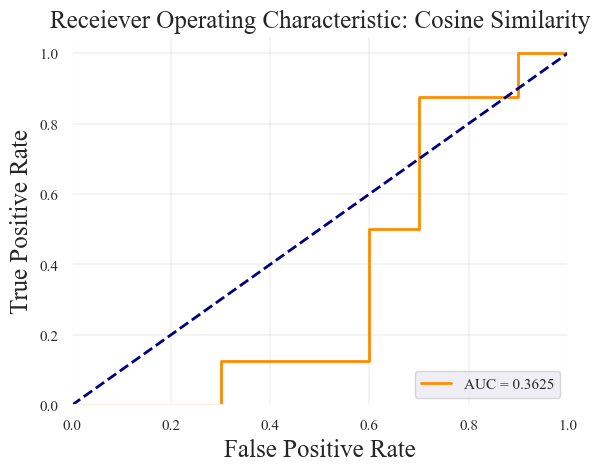

Average Precision: 0.3852658371040724
FPR95: 0.9


In [92]:
ap_cos, fpr95_cos = thresh_acc(cos_scores[0], cos_scores[1], 0.01, "Receiever Operating Characteristic: Cosine Similarity")
print("Average Precision:", ap_cos)
print("FPR95:", fpr95_cos)


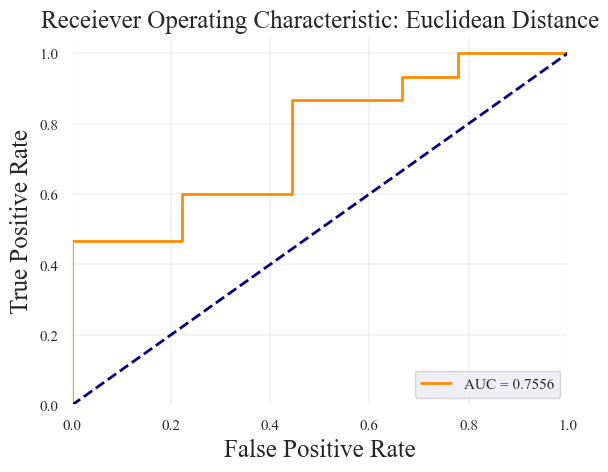

Average Precision: 0.864154995331466
FPR95: 0.7777777777777778


In [93]:
ap_euclid, fpr95_euclid = thresh_acc(euclidean_scores[0], euclidean_scores[1], 1300, "Receiever Operating Characteristic: Euclidean Distance")
print("Average Precision:", ap_euclid)
print("FPR95:", fpr95_euclid)

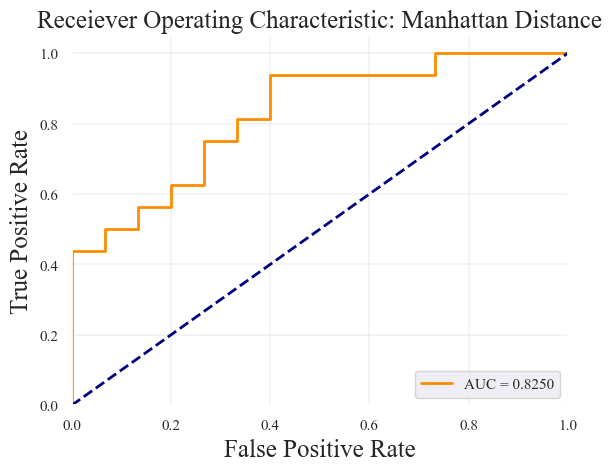

Average Precision: 0.8555459586709587
FPR95: 0.7333333333333333


In [37]:
ap_manhattan, fpr95_manhattan = thresh_acc(manhattan_scores[0], manhattan_scores[1], 850000, "Receiever Operating Characteristic: Manhattan Distance")
print("Average Precision:", ap_manhattan)
print("FPR95:", fpr95_manhattan)

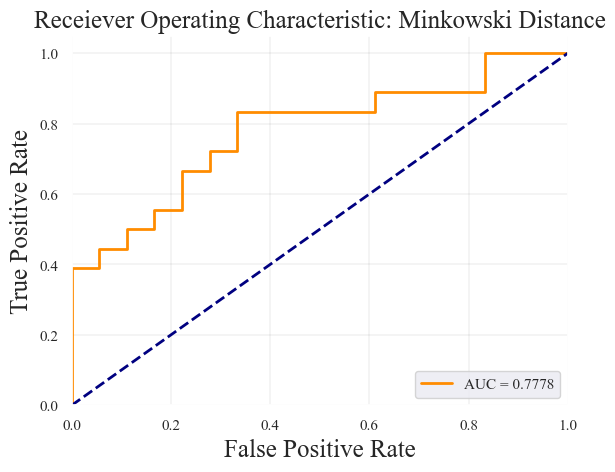

Average Precision: 0.8203022157883271
FPR95: 0.8333333333333334


In [95]:

ap_minkow, fpr95_minkow = thresh_acc(minkowski_scores_euclidean[0], minkowski_scores_euclidean[1], 800000,  "Receiever Operating Characteristic: Minkowski Distance")
print("Average Precision:", ap_minkow)
print("FPR95:", fpr95_minkow)

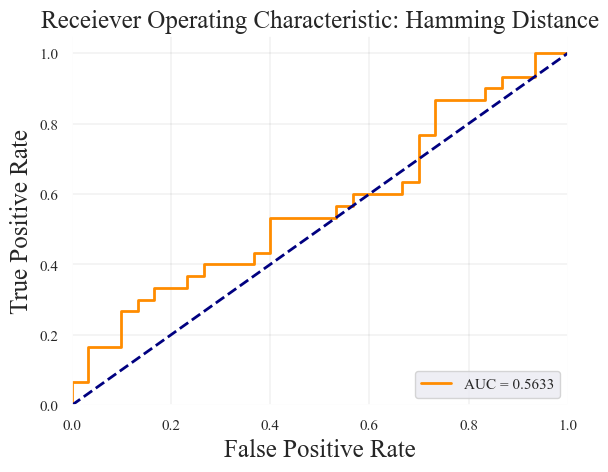

Average Precision: 0.6150776863814237
FPR95: 0.9333333333333333


In [96]:

ap_ham, fpr95_ham = thresh_acc(hamming_scores[0], hamming_scores[1], 40000,  "Receiever Operating Characteristic: Hamming Distance")
print("Average Precision:", ap_ham)
print("FPR95:", fpr95_ham)

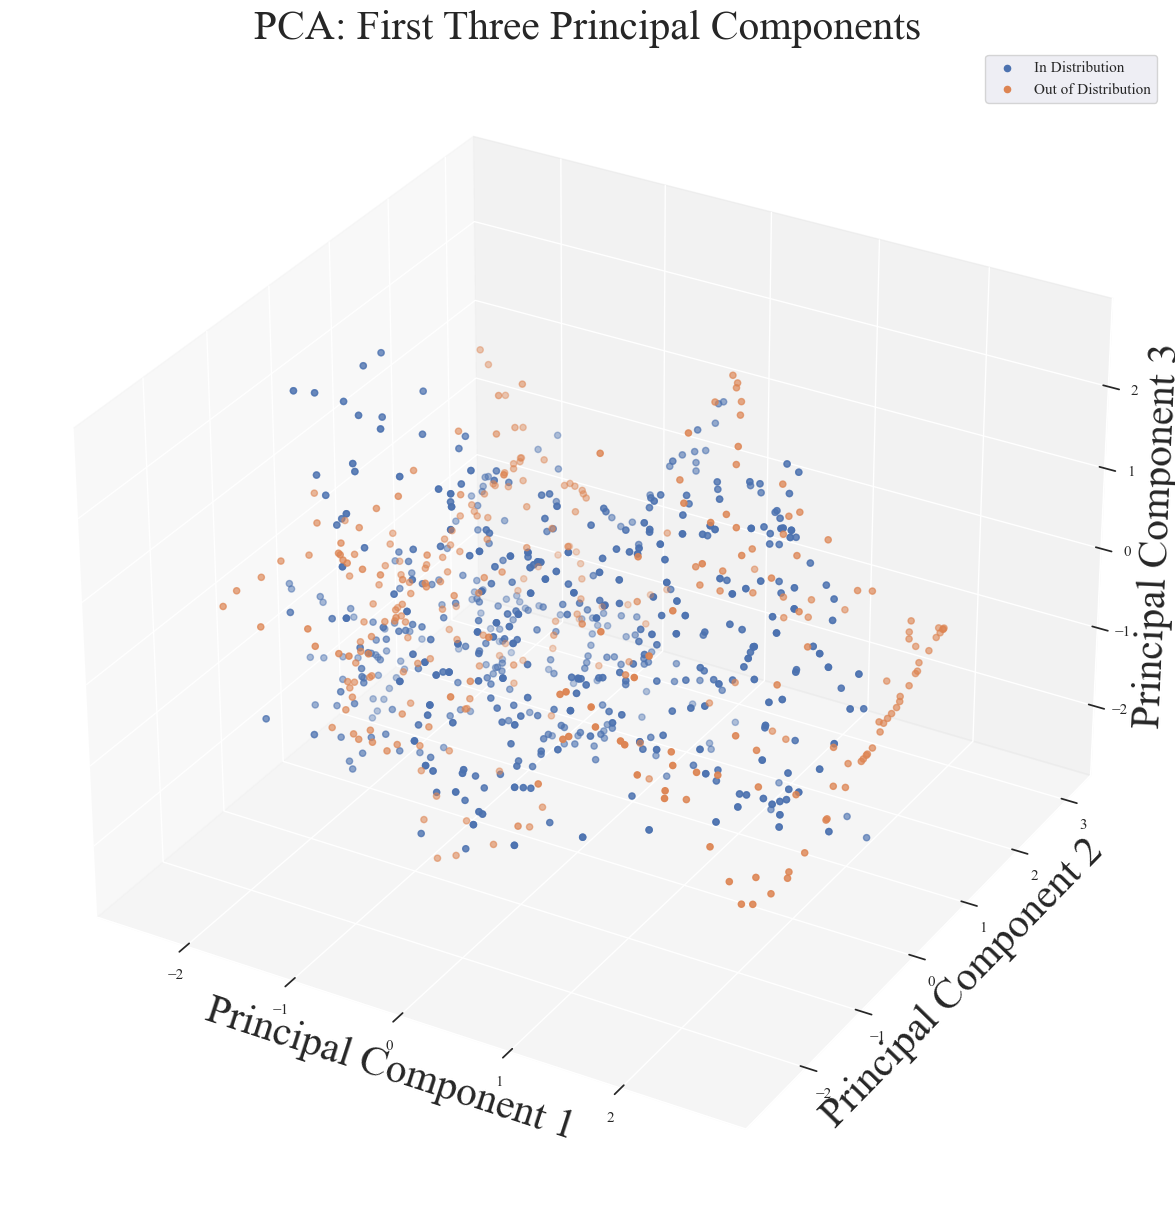

In [287]:

from mpl_toolkits.mplot3d import Axes3D  #
# Perform PCA
pca = PCA(n_components=3)
principal_components_in = pca.fit_transform(embeddings_in_df)
principal_components_out = pca.fit_transform(embeddings_out_df)


# Create a new DataFrame for the principal components
pc_df_in = pd.DataFrame(data=principal_components_in, columns=['PC1', 'PC2', 'PC3'])
pc_df_out = pd.DataFrame(data=principal_components_out, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(15,15)) 
ax = fig.add_subplot(111, projection='3d')

sns.set(font_scale=1.5, rc={"font.family": "serif", "font.serif": ["Times New Roman"]})
sns.set_context("notebook", rc={"font.size": 30, "axes.titlesize": 30, "axes.labelsize": 30})

ax.set_facecolor('white')

ax.scatter(pc_df_in['PC1'], pc_df_in['PC2'], pc_df_in['PC3'], label = "In Distribution")
ax.scatter(pc_df_out['PC1'], pc_df_out['PC2'], pc_df_out['PC3'], label = "Out of Distribution")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: First Three Principal Components')

plt.legend()

plt.savefig('pca3d.pdf', bbox_inches='tight')
plt.show()


